### Importing all the necessary Python packages

In [3]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt

### Importing all the necessary Deep Learning packages

In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers import BatchNormalization

In [6]:
df = pd.read_csv('fer2013.csv') #Reading the dataset using Pandas

In [7]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
len(df.iloc[0]['pixels'].split()) 

2304

In [70]:
# Number of pixels is 48*48

In [9]:
label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']

In [10]:
#Converting the pixels from strings to integer values
img = df.iloc[0]['pixels'].split()
img = [int(i) for i in img]
type(img[0])
len(img)

2304

In [11]:
img = np.array(img)

In [12]:
img = img.reshape(48,48)

In [13]:
img.shape

(48, 48)

Text(0.5, 0, '0')

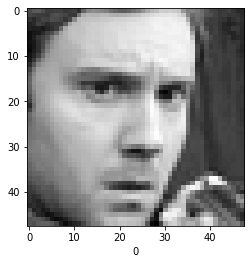

In [14]:
plt.imshow(img, cmap='gray')
plt.xlabel(df.iloc[0]['emotion'])

In [15]:
X = []
y = []

In [16]:
#Creating a function to convert all the pixel data from string to int and appending it to X
#And appending all the corresponding labels to y
#Also dropping the disgust label for containing very less training data

def getData(path):
    anger = 0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    df = pd.read_csv(path)
    
    X = []
    y = []    
    
    for i in range(len(df)):
        if df.iloc[i]['emotion'] != 1:
            if df.iloc[i]['emotion'] == 0:
                if anger <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    anger += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 2:
                if fear <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    fear += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 3:
                if happy <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    happy += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 4:
                if sad <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    sad += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 5:
                if surprise <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    surprise += 1
                else:
                    pass
                
            if df.iloc[i]['emotion'] == 6:
                if neutral <= 4000:            
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    neutral += 1
                else:
                    pass

            
            
    return X, y 

In [17]:
X, y = getData('fer2013.csv')

In [18]:
np.unique(y, return_counts=True)

(array([0, 2, 3, 4, 5, 6], dtype=int64),
 array([4001, 4001, 4001, 4001, 4001, 4001], dtype=int64))

In [19]:
X = np.array(X)/255.0
y = np.array(y)

In [20]:
X.shape, y.shape

((24006, 2304), (24006,))

In [21]:
y_o = []
for i in y:
    if i != 6:
        y_o.append(i)
        
    else:
        y_o.append(1)

In [22]:
np.unique(y_o, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([4001, 4001, 4001, 4001, 4001, 4001], dtype=int64))

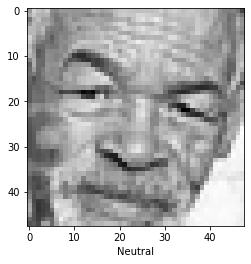

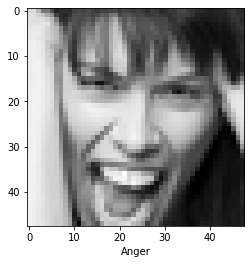

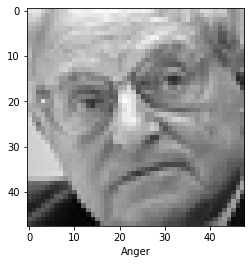

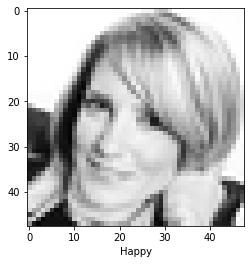

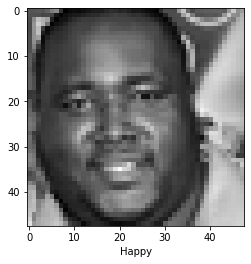

In [23]:
for i in range(5):
    r = np.random.randint((1), 24000, 1)[0]
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y_o[r]])


In [24]:
X = X.reshape(len(X), 48, 48, 1)

In [25]:
X.shape

(24006, 48, 48, 1)

In [26]:
y_new = to_categorical(y_o, num_classes=6)

In [27]:
len(y_o), y_new.shape

(24006, (24006, 6))

In [28]:
y_o[150], y_new[150]

(0, array([1., 0., 0., 0., 0., 0.], dtype=float32))

### Creating the training model

In [71]:
model = Sequential()


input_shape = (48,48,1)


model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [30]:
model.fit(X, y_new, epochs=22, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/22
301/301 [==============================] - 888s 3s/step - loss: 2.1145 - accuracy: 0.2491 - val_loss: 2.3282 - val_accuracy: 0.1125
Epoch 2/22
301/301 [==============================] - 875s 3s/step - loss: 1.6994 - accuracy: 0.3391 - val_loss: 1.4601 - val_accuracy: 0.4202
Epoch 3/22
301/301 [==============================] - 876s 3s/step - loss: 1.5329 - accuracy: 0.4071 - val_loss: 1.7057 - val_accuracy: 0.3344
Epoch 4/22
301/301 [==============================] - 882s 3s/step - loss: 1.4008 - accuracy: 0.4560 - val_loss: 1.9871 - val_accuracy: 0.3344
Epoch 5/22
301/301 [==============================] - 873s 3s/step - loss: 1.2976 - accuracy: 0.4979 - val_loss: 1.3370 - val_accuracy: 0.4621
Epoch 6/22
301/301 [==============================] - 822s 3s/step - loss: 1.2430 - accuracy: 0.5204 - val_loss: 1.3110 - val_accuracy: 0.4971
Epoch 7/22
301/301 [==============================] - 823s 3s/step - loss: 1.1762 - accuracy: 0.5494 - val_loss: 1.5014 - val_accuracy: 0.4157

In [31]:
model.save('model.h5')